Prawdopodobieństwo wygranej drużyny A: 0.91
Prawdopodobieństwo remisu: 0.05
Prawdopodobieństwo wygranej drużyny B: 0.05


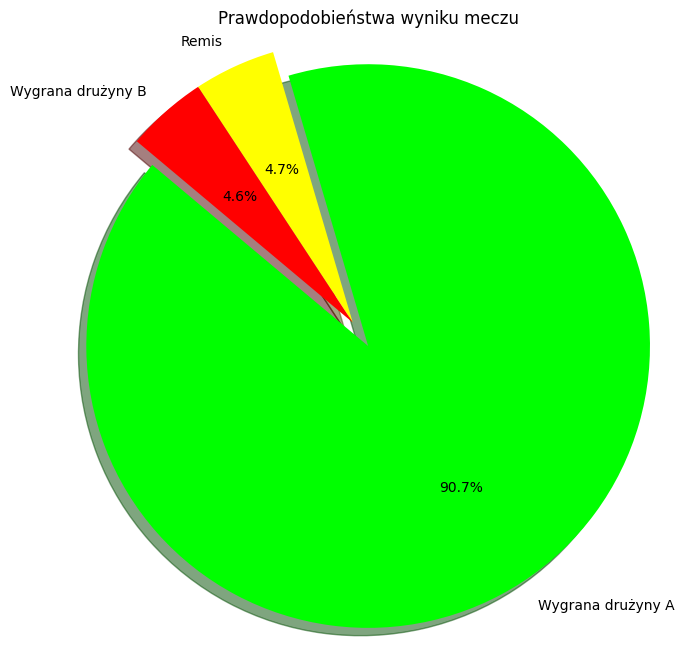

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_elo_probability(elo_a, elo_b, home_advantage=0):
    elo_a += home_advantage
    prob_a = 1 / (1 + 10 ** ((elo_b - elo_a) / 400))
    return prob_a

def calculate_statistical_adjustments(stats_a, stats_b):
    adjustment = 0
    factors = ['goals_scored', 'goals_conceded', 'possession', 'shots_on_target']
    weights = {'goals_scored': 0.4, 'goals_conceded': -0.3, 'possession': 0.2, 'shots_on_target': 0.1}

    for factor in factors:
        adjustment += weights[factor] * (stats_a[factor] - stats_b[factor])

    return adjustment / len(factors)

def calculate_match_probability(elo_a, elo_b, home, stats_a, stats_b):
    home_advantage = 100 if home else 0
    base_probability = calculate_elo_probability(elo_a, elo_b, home_advantage)
    
    stats_adjustment = calculate_statistical_adjustments(stats_a, stats_b)
    
    final_probability = base_probability + stats_adjustment * 0.1
    final_probability = max(0, min(1, final_probability))
    
    return final_probability

def monte_carlo_simulation(num_simulations, elo_a, elo_b, home, stats_a, stats_b):
    wins_a = 0
    wins_b = 0
    draws = 0
    for _ in range(num_simulations):
        prob_a_wins = calculate_match_probability(elo_a, elo_b, home, stats_a, stats_b)
        result = np.random.rand()
        if result < prob_a_wins:
            wins_a += 1
        elif result < prob_a_wins + (1 - prob_a_wins) / 2:
            draws += 1
        else:
            wins_b += 1
    return wins_a / num_simulations, draws / num_simulations, wins_b / num_simulations

import matplotlib.pyplot as plt

def plot_pie_chart(prob_a_wins, prob_draw, prob_b_wins):
    labels = ['Wygrana drużyny A', 'Remis', 'Wygrana drużyny B']
    sizes = [prob_a_wins, prob_draw, prob_b_wins]
    colors = ['#00FF00', '#FFFF00', '#FF0000']  # Kolory: zielony, żółty, czerwony
    explode = (0.1, 0, 0)  # Wyodrębniamy kawałek dla wygranej drużyny A

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Prawdopodobieństwa wyniku meczu')
    plt.axis('equal')  # Utrzymanie kołowego kształtu
    plt.show()


def main():
    elo_a = int(input("Podaj ranking ELO drużyny A: "))
    elo_b = int(input("Podaj ranking ELO drużyny B: "))
    home = input("Czy drużyna A gra u siebie? (tak/nie): ").strip().lower() == 'tak'
    stats_a = {
        'goals_scored': float(input("Podaj średnią liczbę strzelonych bramek drużyny A: ")),
        'goals_conceded': float(input("Podaj średnią liczbę straconych bramek drużyny A: ")),
        'possession': float(input("Podaj średni procent posiadania piłki przez drużynę A: ")),
        'shots_on_target': float(input("Podaj średnią liczbę strzałów celnych drużyny A: "))
    }
    stats_b = {
        'goals_scored': float(input("Podaj średnią liczbę strzelonych bramek drużyny B: ")),
        'goals_conceded': float(input("Podaj średnią liczbę straconych bramek drużyny B: ")),
        'possession': float(input("Podaj średni procent posiadania piłki przez drużynę B: ")),
        'shots_on_target': float(input("Podaj średnią liczbę strzałów celnych drużyny B: "))
    }
    
    num_simulations = int(input("Podaj liczbę symulacji: "))

    # Przeprowadzenie symulacji
    prob_a_wins, prob_draw, prob_b_wins = monte_carlo_simulation(num_simulations, elo_a, elo_b, home, stats_a, stats_b)

    print(f"Prawdopodobieństwo wygranej drużyny A: {prob_a_wins:.2f}")
    print(f"Prawdopodobieństwo remisu: {prob_draw:.2f}")
    print(f"Prawdopodobieństwo wygranej drużyny B: {prob_b_wins:.2f}")
    
    # Rysowanie wykresu kołowego
    plot_pie_chart(prob_a_wins, prob_draw, prob_b_wins)

if __name__ == "__main__":
    main()
